In [1]:
# Initial imports.
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Loading data
file_path = Path("../Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

amount  term  age  bad  month_num  education_Bachelor  \
0    1000    30   45    0          6                   0   
1    1000    30   50    0          7                   1   
2    1000    30   33    0          8                   1   
3    1000    15   27    0          9                   0   
4    1000    30   28    0         10                   0   

   education_High School or Below  education_Master or Above  \
0                               1                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   education_college  gender_female  gender_male  
0                  0              0            1  
1                  0              1            0  
2                  0              1            0  
3                  1              0            1  
4                  1              1            0

# Preprocess the Data
Now, we're going to walk through the preprocessing steps for the loan applications' encoded data so that we can fit our training and testing sets with the random forest model.

In [3]:
# Define the features set.
X = df_loans.copy()
X = X.drop("bad", axis=1)
X.head()

amount  term  age  month_num  education_Bachelor  \
0    1000    30   45          6                   0   
1    1000    30   50          7                   1   
2    1000    30   33          8                   1   
3    1000    15   27          9                   0   
4    1000    30   28         10                   0   

   education_High School or Below  education_Master or Above  \
0                               1                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   education_college  gender_female  gender_male  
0                  0              0            1  
1                  0              1            0  
2                  0              1            0  
3                  1              0            1  
4                  1              1            0

we define the target set. Here, we're using the ravel() method, which performs the same procedure on our target set data as the values attribute.

In [4]:
# Define the target set.
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

Now, we split into the training and testing sets.

In [5]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Lastly, we can create the StandardScaler instance, fit the scaler with the training set, and scale the data.

In [6]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fit the Random Forest Model
Before we fit the random forest model to our X_train_scaledand y_train training data, we'll create a random forest instance using the random forest classifier, RandomForestClassifier().

In [ ]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

The RandomForestClassifier takes a variety of parameters, but for our purposes we only need the n_estimators and the random_state.

## NOTE
Consult the sklearn documentation for additional information about the RandomForestClassifier and the parameters it takes.

The n_estimators will allow us to set the number of trees that will be created by the algorithm. Generally, the higher number makes the predictions stronger and more stable, but can slow down the output because of the higher training time allocated. The best practice is to use between 64 and 128 random forests, though higher numbers are quite common despite the higher training time. For our purposes, we'll create 128 random forests.

After we create the random forest instance, we need to fit the model with our training sets.

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Make Predictions Using the Testing Data
After fitting the model, we can run the following code to make predictions using the scaled testing data:

In [ ]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

The output will be similar as when the predictions were determined for the decision tree.

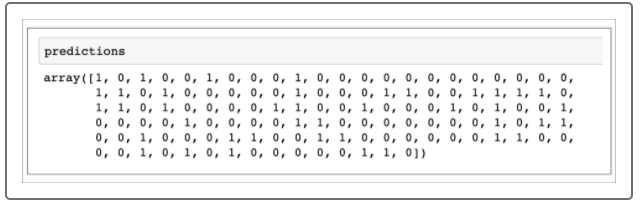

# Evaluate the Model
After making predictions on the scaled testing data, we analyze how well our random forest model classifies loan applications by using the confusion_matrix.

In [ ]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df


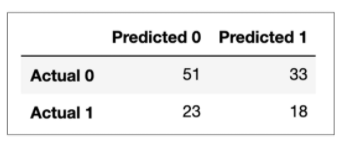

These results are relatively the same as the decision tree model. To improve our predictions, let's increase the n_estimators to 500. After running all the code again, after changing the n_estimators to 500, our confusion matrix DataFrame is about the same as before.

Using the equation (TP + TN) / Total, we can determine our accuracy (determine how often the classifier predicts correctly) by running the following code. For this model, our accuracy score is 0.520:

In [ ]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

Lastly, we can print out the above results along with the classification report for the two classes:

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

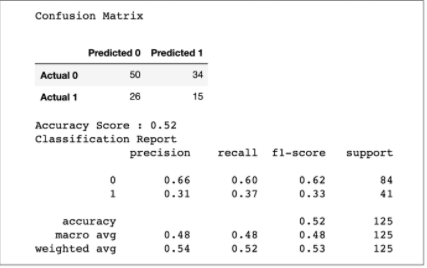

From the confusion matrix results, the precision for the the bad loan applications is low, indicating a large number of false positives, which indicates an unreliable positive classification. The recall is also low for the bad loan applications, which is indicative of a large number of false negatives. The F1 score is also low (33).

In summary, this random forest model is not good at classifying fraudulent loan applications because the model's accuracy, 0.520, and F1 score are low.

# Rank the Importance of Features
One nice byproduct of the random forest algorithm is to rank the features by their importance, which allows us to see which features have the most impact on the decision.

To calculate the feature importance, we can use thefeature_importances_attribute with the following code:

In [ ]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

The output from this code returns an array of scores for the features in the X_test set, whose sum equals 1.0:

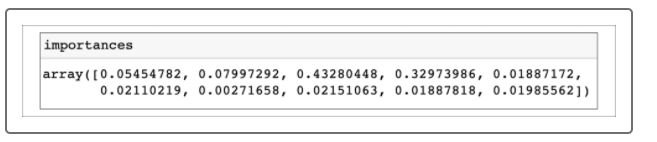

In [ ]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

In the code, the sorted function will sort the zipped list of features with their column name (X.columns) in reverse order—more important features first—with reverse=True.

Running this code will return the following output:

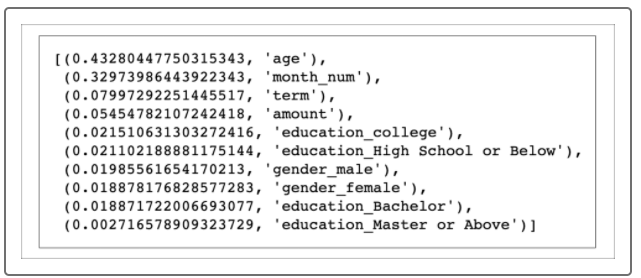

Now we can clearly see which features, or columns, of the loan application are more relevant. The age and month_num of the loan application are the more relevant features.

To improve this model, we can drop some of the lower ranked features.